**Assignment 8**  
1.

In [ ]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import preprocessing
import time

wine = datasets.load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
mat=df.to_numpy()
#print(wine.DESCR)
print("Shape of matrix loaded:",mat.shape)
print("Number of Features:",mat.shape[1]-1)
print("Number of Patterns:",mat.shape[0])
print(mat)

Shape of matrix loaded: (178, 14)
Number of Features: 13
Number of Patterns: 178
[[  14.23    1.71    2.43 ...    3.92 1065.      0.  ]
 [  13.2     1.78    2.14 ...    3.4  1050.      0.  ]
 [  13.16    2.36    2.67 ...    3.17 1185.      0.  ]
 ...
 [  13.27    4.28    2.26 ...    1.56  835.      2.  ]
 [  13.17    2.59    2.37 ...    1.62  840.      2.  ]
 [  14.13    4.1     2.74 ...    1.6   560.      2.  ]]


In [ ]:
np.random.shuffle(mat)  
X=mat[:,:-1]
X = preprocessing.normalize(X)
X=np.column_stack((np.ones(X.shape[0]),X))
Y=mat[:,-1]
numClasses =(int)(np.max(Y)-np.min(Y) + 1)
Y=np.zeros((X.shape[0],numClasses))

for i in range(0,numClasses):
    for ex in range(X.shape[0]):
        Y[ex][i]=1 if mat[ex][-1]==i else 0

train_size=int(X.shape[0]*0.4)
val_size=int(X.shape[0]*0.2)
X_train,Y_train=X[0:train_size,:],Y[0:train_size,:]
X_val,Y_val=X[train_size:train_size+val_size,:],Y[train_size:train_size+val_size,:]
X_test,Y_test=X[train_size+val_size:,:],Y[train_size+val_size:,:]


In [ ]:
def MSE(pred,Y):
  return np.sum(np.square(pred-Y))/Y.shape[0]
def sigmoid(X,w):
    X=X.reshape(X.shape[0],1)
    x=w.dot(X)
    return 1/(1+np.exp(-x))
    

a.

In [ ]:
alpha=[0.01, 0.3, 0.5, 1.0]
epoch=[10,100,150,200]

In [ ]:
w=np.random.random((numClasses,X_val.shape[1]))
hp=np.zeros(shape=(len(alpha)))
for a in range(len(alpha)):
    for ep in range(epoch[a]):
        err=0
        for ip in range(X_val.shape[0]):
            d=sigmoid(X_val[ip,:],w)
            for className in range(numClasses):
                w[className,:]=w[className,:]+alpha[a]*(Y_val[ip][className]-d[className])*X_val[ip,:]*(1-d[className])*d[className]
            err+=MSE(d,Y_val[ip:].T)
        if ep==epoch[a]-1:
            hp[a]=err/X_val.shape[0]

    
print(hp)
hp_min=min(hp)
best, = np.where(np.isclose(hp, hp_min))
best_param = best[0]
print('Best values are at:',best_param)

[168.05750923 139.04758487 145.91331612 162.86386962]
Best values are at: 1


b.

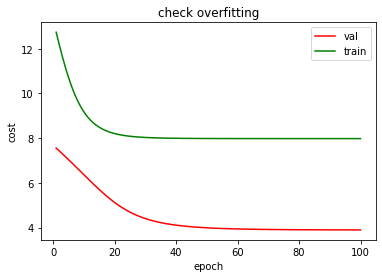

In [ ]:
w=np.random.random((numClasses,X_train.shape[1]))
epoch=100
alpha=0.01
j_train=[]
j_val=[]
for ep in range(epoch):
    errTrain=0
    for ip in range(X_train.shape[0]):
        d=sigmoid(X_train[ip,:],w)
        for className in range(numClasses):
            w[className,:]=w[className,:]+alpha*(Y_train[ip][className]-d[className])*X_train[ip,:]*(1-d[className])*d[className]
        errTrain+=MSE(d,Y_train[ip:].T)
    j_train.append(errTrain/X_train.shape[0])
    
w=np.random.random((numClasses,X_val.shape[1]))
for ep in range(epoch):
    errVal=0
    for ip in range(X_val.shape[0]):
        d=sigmoid(X_val[ip,:],w)
        for className in range(numClasses):
            w[className,:]=w[className,:]+alpha*(Y_val[ip][className]-d[className])*X_val[ip,:]*(1-d[className])*d[className]
        errVal+=MSE(d,Y_val[ip:].T)
    j_val.append(errVal/X_val.shape[0])

itr=np.arange(1,epoch+1,1)
plt.plot(itr, j_val, color='r', label='val')
plt.plot(itr, j_train, color='g', label='train')
plt.xlabel("epoch")
plt.ylabel("cost")
plt.title("check overfitting")
plt.legend()
plt.show()